In [135]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

## mean±std

In [149]:
df = pd.read_excel("./溶胀率.xlsx")

In [71]:
mean_df = pd.DataFrame(columns=df.columns)
std_df = pd.DataFrame(columns=df.columns)
mean_std = pd.DataFrame(columns=df.columns, )

In [72]:
for i in range(int(len(df)/3)):
    mean_df.loc[i] = round(df[i*3:i*3+3].mean(),2)
    std_df.loc[i] = round(df[i*3:i*3+3].std(),2)

In [73]:
for i in range(len(mean_df)):
    mean_std.loc[i] = [
        str(mean_df.loc[i, "0h"])+"±"+str(std_df.loc[i, "0h"]),
        str(mean_df.loc[i, "0.5h"])+"±"+str(std_df.loc[i, "0.5h"]),
        str(mean_df.loc[i, "1h"])+"±"+str(std_df.loc[i, "1h"]),
        str(mean_df.loc[i, "1.5h"])+"±"+str(std_df.loc[i, "1.5h"]),
        str(mean_df.loc[i, "2h"])+"±"+str(std_df.loc[i, "2h"]),
        str(mean_df.loc[i, "2.5h"])+"±"+str(std_df.loc[i, "2.5h"]),
        str(mean_df.loc[i, "3h"])+"±"+str(std_df.loc[i, "3h"]),
        str(mean_df.loc[i, "4h"])+"±"+str(std_df.loc[i, "4h"]),
        str(mean_df.loc[i, "5h"])+"±"+str(std_df.loc[i, "5h"]),
        str(mean_df.loc[i, "6h"])+"±"+str(std_df.loc[i, "6h"]),
    ]

In [74]:
mean_std.to_excel("./mean_std.xlsx")

## 显著性分析

In [115]:
C1 = mean_df.loc[0]
C2 = mean_df.loc[1]
C3 = mean_df.loc[2]


In [117]:
for i in range(len(mean_df)):
    name='C'+str(i+1)
    locals()['C'+str(i+1)]=mean_df.loc[i]

In [121]:
stats.f_oneway(C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, C15, C16, C17, C18, C19, C20, C21)

F_onewayResult(statistic=50.04243170485204, pvalue=1.748528701949344e-64)

In [127]:
df = pd.read_csv("./test.csv")

In [129]:
df.drop('person', axis= 1, inplace= True)

In [131]:
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

In [138]:
df

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4
5,low,5
6,low,2
7,low,4
8,low,2
9,low,3


In [136]:
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.466667,1.76743,0.456349,2.487896,4.445437


In [137]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.581139,0.707107,3.450484,6.549516
low,5,3.2,1.303840,0.583095,1.922236,4.477764
placebo,5,2.2,1.303840,0.583095,0.922236,3.477764


In [139]:
stats.f_oneway(df['libido'][df['dose'] == 'high'], 
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

In [144]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


In [145]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['libido'], df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
  high     low     -1.8 0.1472 -4.1651  0.5651  False
  high placebo     -2.8 0.0209 -5.1651 -0.4349   True
   low placebo     -1.0 0.5171 -3.3651  1.3651  False
-----------------------------------------------------


In [153]:
rp.summary_cont(df['The type of film'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,0.5h,81.0,31.398609,44.724086,4.969343,21.509302,41.287917


In [155]:
rp.summary_cont(df['0.5h'].groupby(df['The type of film']))

,N,Mean,SD,SE,95% Conf.,Interval
The type of film,,,,,,
C1,3,106.413333,0.090185,0.052068,106.288343,106.538323
C10,3,1.923889,0.009021,0.005208,1.911387,1.936391
C11,3,4.305296,0.006687,0.003861,4.296028,4.314563
C12,3,2.261398,0.014926,0.008618,2.240711,2.282085
C13,3,2.076306,0.011385,0.006573,2.060527,2.092084
C14,3,2.010623,0.003506,0.002024,2.005763,2.015483
C15,3,4.042504,0.009181,0.005301,4.029779,4.055229
C16,3,2.472529,0.002253,0.001301,2.469407,2.475652
C17,3,2.185436,0.007171,0.004140,2.175498,2.195374


In [172]:
t = "1.5h"
mc = MultiComparison(df['{}'.format(t)], df['The type of film'])
mc_results = mc.tukeyhsd()
print(mc_results)
file = open("./result/{}.txt".format(t), "w+")
print(mc_results, file=file)
file.close()

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    C1    C10 -104.3396  0.001 -104.9508 -103.7285   True
    C1    C11 -105.4029  0.001 -106.0141 -104.7918   True
    C1    C12 -105.5118  0.001  -106.123 -104.9007   True
    C1    C13 -104.6286  0.001 -105.2397 -104.0174   True
    C1    C14 -104.9212  0.001 -105.5323   -104.31   True
    C1    C15 -104.8996  0.001 -105.5108 -104.2885   True
    C1    C16 -105.3431  0.001 -105.9543  -104.732   True
    C1    C17 -105.6102  0.001 -106.2214  -104.999   True
    C1    C18 -105.3885  0.001 -105.9996 -104.7773   True
    C1    C19 -105.8969  0.001  -106.508 -105.2857   True
    C1     C2  -16.0277  0.001  -16.6388  -15.4165   True
    C1    C20 -105.9271  0.001 -106.5383  -105.316   True
    C1    C21 -106.1892  0.001 -106.8003  -105.578   True
    C1    C22 -106.2949  0.001 -106.9061 -105.6837   True
    C1    C23 

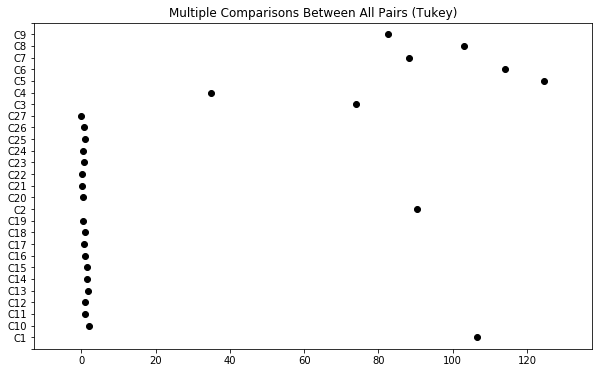

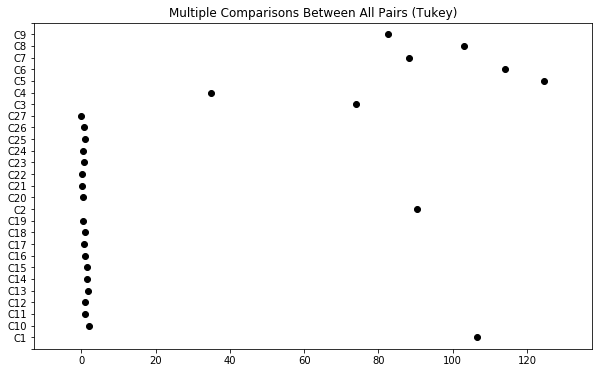

In [173]:
mc_results.plot_simultaneous()